In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import train, test
from PIL import Image
import pandas as pd
import numpy as np
from convnet import ConvNet

In [2]:
cifar10_root = '../cifar10'
ipc50 = np.loadtxt('./random_ipc_index/ipc_50.txt', dtype=int)
ipc50

array([10868, 25090, 37128, 26269, 21392, 39571, 45758,  5098,   619,
       46667, 14106, 41213, 26809,  5200, 19237, 16443, 15942, 37172,
        5218, 42971, 21383, 47526,  2051, 16189, 21365,  4053, 31179,
       47251, 44540, 11481, 48149, 35531,  7592, 36655, 37262, 22577,
       14715, 39485, 49103, 37928,  9413, 35878, 23317, 14264,  5822,
       19082, 18311, 29832, 16027, 16902, 10711, 21309, 17603, 44328,
       40515,  4310,  3863, 48248, 36401,  6805, 45414, 22882, 33149,
       26876, 28823, 42513,  2653, 46581,  5624, 12996, 42634,  8182,
       16631, 19730, 30435, 45510, 18698, 31183, 42041, 12455, 23424,
       17350, 42212, 46089, 28553, 22272, 12104, 46149, 42088, 37230,
        8040, 42237, 20257, 38213, 39430, 47567, 16732, 18730, 17263,
       34180, 41320, 21898, 34583, 26068, 11171, 20577, 20869, 37097,
       34354,  5129, 30379, 27043, 12987, 21635, 20333, 38791,  1439,
       21111, 43750, 38584, 12323, 25170, 30728, 37432, 36007, 11168,
       38900, 47077,

In [3]:
cifar10_train = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=True,
                                            transform=transforms.Compose([
                                                                          # transforms.Resize(128),
                                                                          transforms.RandomHorizontalFlip(),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                                        ]))


cifar10_test = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                # transforms.Resize(128),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [4]:
batch_size = 16
train_data_loader = DataLoader(cifar10_train, batch_size=batch_size, sampler=SubsetRandomSampler(ipc50))
test_data_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

In [5]:
len(train_data_loader)

32

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [7]:
import os

model_name = 'ConvNetD3'
dataset = 'cifar10_ipc50'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
# Following ConvNetD3's definition from the DATM paper, but first one changed to 32 from 128
net_width, net_depth, net_act, net_norm, net_pooling = 32, 3, 'relu', 'instancenorm', 'avgpooling'
model = ConvNet(channel=3, num_classes=10, net_width=net_width, net_depth=3, net_act=net_act, net_norm=net_norm, net_pooling=net_pooling)

In [8]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100)

Epoch 1: 100%|██████████| 32/32 [00:00<00:00, 63.91it/s, loss=2.04]


epoch: 1 done, loss: 0.001441077678464353
Acc: 0.2103
[0.001]


Epoch 2: 100%|██████████| 32/32 [00:00<00:00, 159.07it/s, loss=1.93]


epoch: 2 done, loss: 0.0013006756780669093
Acc: 0.2662
[0.001]


Epoch 3: 100%|██████████| 32/32 [00:00<00:00, 145.97it/s, loss=1.88]


epoch: 3 done, loss: 0.0012187459506094456
Acc: 0.318
[0.001]


Epoch 4: 100%|██████████| 32/32 [00:00<00:00, 144.15it/s, loss=1.79]


epoch: 4 done, loss: 0.0011287142988294363
Acc: 0.3288
[0.001]


Epoch 5: 100%|██████████| 32/32 [00:00<00:00, 172.21it/s, loss=1.23]


epoch: 5 done, loss: 0.00105450174305588
Acc: 0.3425
[0.001]


Epoch 6: 100%|██████████| 32/32 [00:00<00:00, 161.90it/s, loss=1.77]


epoch: 6 done, loss: 0.000991546781733632
Acc: 0.357
[0.001]


Epoch 7: 100%|██████████| 32/32 [00:00<00:00, 161.33it/s, loss=1.25]


epoch: 7 done, loss: 0.0009349932661280036
Acc: 0.3637
[0.001]


Epoch 8: 100%|██████████| 32/32 [00:00<00:00, 144.68it/s, loss=0.5] 


epoch: 8 done, loss: 0.000847767514642328
Acc: 0.3777
[0.001]


Epoch 9: 100%|██████████| 32/32 [00:00<00:00, 123.63it/s, loss=1.36] 


epoch: 9 done, loss: 0.000773935578763485
Acc: 0.3896
[0.001]


Epoch 10: 100%|██████████| 32/32 [00:00<00:00, 171.29it/s, loss=0.547]


epoch: 10 done, loss: 0.0007380899623967707
Acc: 0.3745
[0.001]


Epoch 11: 100%|██████████| 32/32 [00:00<00:00, 167.41it/s, loss=2.07] 


epoch: 11 done, loss: 0.000709089043084532
Acc: 0.3919
[0.001]


Epoch 12: 100%|██████████| 32/32 [00:00<00:00, 124.45it/s, loss=1.12] 


epoch: 12 done, loss: 0.0006501702009700239
Acc: 0.3927
[0.001]


Epoch 13: 100%|██████████| 32/32 [00:00<00:00, 148.58it/s, loss=0.216]


epoch: 13 done, loss: 0.0005739877815358341
Acc: 0.3803
[0.001]


Epoch 14: 100%|██████████| 32/32 [00:00<00:00, 148.20it/s, loss=0.627]


epoch: 14 done, loss: 0.0005588082130998373
Acc: 0.4022
[0.001]


Epoch 15: 100%|██████████| 32/32 [00:00<00:00, 146.35it/s, loss=0.317]


epoch: 15 done, loss: 0.00048474688082933426
Acc: 0.3981
[0.0001]


Epoch 16: 100%|██████████| 32/32 [00:00<00:00, 129.41it/s, loss=0.411]


epoch: 16 done, loss: 0.00039207644294947386
Acc: 0.4075
[0.0001]


Epoch 17: 100%|██████████| 32/32 [00:00<00:00, 141.08it/s, loss=0.499]


epoch: 17 done, loss: 0.0003728026931639761
Acc: 0.4145
[0.0001]


Epoch 18: 100%|██████████| 32/32 [00:00<00:00, 132.70it/s, loss=0.828]


epoch: 18 done, loss: 0.00036096983239986
Acc: 0.4146
[0.0001]


Epoch 19: 100%|██████████| 32/32 [00:00<00:00, 137.82it/s, loss=0.459]


epoch: 19 done, loss: 0.0003454487887211144
Acc: 0.4144
[0.0001]


Epoch 20: 100%|██████████| 32/32 [00:00<00:00, 116.26it/s, loss=0.549]


epoch: 20 done, loss: 0.000330427719745785
Acc: 0.4146
[0.0001]


Epoch 21: 100%|██████████| 32/32 [00:00<00:00, 133.53it/s, loss=0.502]


epoch: 21 done, loss: 0.00032665234175510705
Acc: 0.4164
[0.0001]


Epoch 22: 100%|██████████| 32/32 [00:00<00:00, 151.63it/s, loss=0.359]


epoch: 22 done, loss: 0.0003205670218449086
Acc: 0.4162
[0.0001]


Epoch 23: 100%|██████████| 32/32 [00:00<00:00, 156.12it/s, loss=0.689]


epoch: 23 done, loss: 0.00031945976661518216
Acc: 0.4149
[1e-05]


Epoch 24: 100%|██████████| 32/32 [00:00<00:00, 162.79it/s, loss=0.747]


epoch: 24 done, loss: 0.00031629964360035956
Acc: 0.4155
[1e-05]


Epoch 25: 100%|██████████| 32/32 [00:00<00:00, 163.73it/s, loss=0.793]


epoch: 25 done, loss: 0.0003126234805677086
Acc: 0.415
[1e-05]


Epoch 26: 100%|██████████| 32/32 [00:00<00:00, 130.07it/s, loss=0.479]


epoch: 26 done, loss: 0.00031363204470835626
Acc: 0.4145
[1e-05]


Epoch 27: 100%|██████████| 32/32 [00:00<00:00, 147.10it/s, loss=0.293]


epoch: 27 done, loss: 0.00030948847415857017
Acc: 0.4144
[1.0000000000000002e-06]


Epoch 28: 100%|██████████| 32/32 [00:00<00:00, 158.46it/s, loss=1.01] 


epoch: 28 done, loss: 0.000318974198307842
Acc: 0.4142
[1.0000000000000002e-06]


Epoch 29: 100%|██████████| 32/32 [00:00<00:00, 142.44it/s, loss=0.432]


epoch: 29 done, loss: 0.0003133470891043544
Acc: 0.4144
[1.0000000000000002e-06]


Epoch 30: 100%|██████████| 32/32 [00:00<00:00, 142.77it/s, loss=0.41] 


epoch: 30 done, loss: 0.000307748414343223
Acc: 0.4149
[1.0000000000000002e-06]


Epoch 31: 100%|██████████| 32/32 [00:00<00:00, 157.56it/s, loss=0.418]


epoch: 31 done, loss: 0.0003003108431585133
Acc: 0.4148
[1.0000000000000002e-06]


Epoch 32: 100%|██████████| 32/32 [00:00<00:00, 150.13it/s, loss=0.399]


epoch: 32 done, loss: 0.00029836015892215073
Acc: 0.4148
[1.0000000000000002e-06]


Epoch 33: 100%|██████████| 32/32 [00:00<00:00, 153.30it/s, loss=0.433]


epoch: 33 done, loss: 0.00030255550518631935
Acc: 0.4151
[1.0000000000000002e-06]


Epoch 34: 100%|██████████| 32/32 [00:00<00:00, 127.11it/s, loss=0.216]


epoch: 34 done, loss: 0.0003093067789450288
Acc: 0.4151
[1.0000000000000002e-06]


Epoch 35: 100%|██████████| 32/32 [00:00<00:00, 128.28it/s, loss=0.226]


epoch: 35 done, loss: 0.00030555654666386545
Acc: 0.4148
[1.0000000000000002e-06]


Epoch 36: 100%|██████████| 32/32 [00:00<00:00, 141.85it/s, loss=0.411]


epoch: 36 done, loss: 0.00030766386771574616
Acc: 0.415
[1.0000000000000002e-06]


Epoch 37: 100%|██████████| 32/32 [00:00<00:00, 146.03it/s, loss=0.273]


epoch: 37 done, loss: 0.0003070256789214909
Acc: 0.4149
[1.0000000000000002e-06]


Epoch 38: 100%|██████████| 32/32 [00:00<00:00, 128.67it/s, loss=0.473]


epoch: 38 done, loss: 0.0003005598846357316
Acc: 0.4147
[1.0000000000000002e-06]


Epoch 39: 100%|██████████| 32/32 [00:00<00:00, 148.26it/s, loss=0.528]


epoch: 39 done, loss: 0.00030297075863927603
Acc: 0.4146
[1.0000000000000002e-06]


Epoch 40: 100%|██████████| 32/32 [00:00<00:00, 139.52it/s, loss=0.537]


epoch: 40 done, loss: 0.0003116200095973909
Acc: 0.4144
[1.0000000000000002e-06]


Epoch 41: 100%|██████████| 32/32 [00:00<00:00, 132.79it/s, loss=0.312]


epoch: 41 done, loss: 0.0003009841893799603
Acc: 0.4148
[1.0000000000000002e-06]


Epoch 42: 100%|██████████| 32/32 [00:00<00:00, 105.35it/s, loss=0.364]


epoch: 42 done, loss: 0.0002967694599647075
Acc: 0.4149
[1.0000000000000002e-06]


Epoch 43: 100%|██████████| 32/32 [00:00<00:00, 122.14it/s, loss=0.343]


epoch: 43 done, loss: 0.00029449447174556553
Acc: 0.4149
[1.0000000000000002e-06]


Epoch 44: 100%|██████████| 32/32 [00:00<00:00, 112.32it/s, loss=0.68] 


epoch: 44 done, loss: 0.0003046034835278988
Acc: 0.4147
[1.0000000000000002e-06]


Epoch 45: 100%|██████████| 32/32 [00:00<00:00, 120.75it/s, loss=0.655]


epoch: 45 done, loss: 0.0003108351374976337
Acc: 0.4147
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 32/32 [00:00<00:00, 115.72it/s, loss=0.348]


epoch: 46 done, loss: 0.00029928094591014087
Acc: 0.4149
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 32/32 [00:00<00:00, 98.89it/s, loss=0.299]


epoch: 47 done, loss: 0.000287529022898525
Acc: 0.4148
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 32/32 [00:00<00:00, 103.29it/s, loss=0.35] 


epoch: 48 done, loss: 0.0003005038888659328
Acc: 0.4148
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 32/32 [00:00<00:00, 112.57it/s, loss=0.659]


epoch: 49 done, loss: 0.0003110393590759486
Acc: 0.4149
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 32/32 [00:00<00:00, 118.58it/s, loss=0.505]


epoch: 50 done, loss: 0.00030076567782089114
Acc: 0.4149
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 32/32 [00:00<00:00, 94.59it/s, loss=0.227]


epoch: 51 done, loss: 0.0002968733897432685
Acc: 0.4147
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 32/32 [00:00<00:00, 113.03it/s, loss=0.429]


epoch: 52 done, loss: 0.0003072530380450189
Acc: 0.4147
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 32/32 [00:00<00:00, 112.77it/s, loss=0.524]


epoch: 53 done, loss: 0.00030531088123098016
Acc: 0.415
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 32/32 [00:00<00:00, 119.46it/s, loss=0.51] 


epoch: 54 done, loss: 0.0003032156964763999
Acc: 0.415
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 32/32 [00:00<00:00, 106.16it/s, loss=0.717]


epoch: 55 done, loss: 0.00030394643545150757
Acc: 0.415
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 32/32 [00:00<00:00, 117.49it/s, loss=0.719]


epoch: 56 done, loss: 0.00030996938585303724
Acc: 0.4148
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 32/32 [00:00<00:00, 124.16it/s, loss=0.249]


epoch: 57 done, loss: 0.00029818780603818595
Acc: 0.4146
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 32/32 [00:00<00:00, 120.65it/s, loss=0.487]


epoch: 58 done, loss: 0.00030722140218131244
Acc: 0.4145
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 32/32 [00:00<00:00, 91.22it/s, loss=0.524]


epoch: 59 done, loss: 0.0003048921935260296
Acc: 0.4146
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 32/32 [00:00<00:00, 120.98it/s, loss=0.479]


epoch: 60 done, loss: 0.0003050247032660991
Acc: 0.4145
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 32/32 [00:00<00:00, 98.29it/s, loss=0.258] 


epoch: 61 done, loss: 0.00030145200435072184
Acc: 0.4144
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 32/32 [00:00<00:00, 112.76it/s, loss=0.508]


epoch: 62 done, loss: 0.00030262989457696676
Acc: 0.4142
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 32/32 [00:00<00:00, 130.14it/s, loss=0.533]


epoch: 63 done, loss: 0.00030152895487844944
Acc: 0.4144
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 32/32 [00:00<00:00, 116.72it/s, loss=0.531]


epoch: 64 done, loss: 0.0003104468632955104
Acc: 0.4144
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 32/32 [00:00<00:00, 109.18it/s, loss=0.247]


epoch: 65 done, loss: 0.0003047201898880303
Acc: 0.4142
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 32/32 [00:00<00:00, 92.37it/s, loss=0.478] 


epoch: 66 done, loss: 0.0002966323518194258
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 32/32 [00:00<00:00, 114.67it/s, loss=0.472]


epoch: 67 done, loss: 0.0002987411280628294
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 32/32 [00:00<00:00, 111.06it/s, loss=0.413]


epoch: 68 done, loss: 0.0003101526526734233
Acc: 0.4145
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 32/32 [00:00<00:00, 94.74it/s, loss=0.612] 


epoch: 69 done, loss: 0.0003080227761529386
Acc: 0.4145
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 32/32 [00:00<00:00, 122.94it/s, loss=0.615]


epoch: 70 done, loss: 0.00030873678042553365
Acc: 0.4145
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 32/32 [00:00<00:00, 126.18it/s, loss=0.499]


epoch: 71 done, loss: 0.00030427673482336104
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 32/32 [00:00<00:00, 109.58it/s, loss=0.471]


epoch: 72 done, loss: 0.000296104873996228
Acc: 0.4146
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 32/32 [00:00<00:00, 115.74it/s, loss=0.539]


epoch: 73 done, loss: 0.00030863546999171376
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 32/32 [00:00<00:00, 113.01it/s, loss=0.243]


epoch: 74 done, loss: 0.00029403597000055015
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 32/32 [00:00<00:00, 119.43it/s, loss=0.131]


epoch: 75 done, loss: 0.00030745219555683434
Acc: 0.4142
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 32/32 [00:00<00:00, 118.19it/s, loss=0.256]


epoch: 76 done, loss: 0.0002920481492765248
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 32/32 [00:00<00:00, 115.62it/s, loss=0.569]


epoch: 77 done, loss: 0.0003079943999182433
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 32/32 [00:00<00:00, 115.35it/s, loss=0.623]


epoch: 78 done, loss: 0.0003025374608114362
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 32/32 [00:00<00:00, 103.13it/s, loss=0.248]


epoch: 79 done, loss: 0.00030377437360584736
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 32/32 [00:00<00:00, 100.22it/s, loss=0.779]


epoch: 80 done, loss: 0.00030470022466033697
Acc: 0.4142
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 32/32 [00:00<00:00, 115.34it/s, loss=0.526]


epoch: 81 done, loss: 0.0002984666498377919
Acc: 0.4144
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 32/32 [00:00<00:00, 124.22it/s, loss=0.435]


epoch: 82 done, loss: 0.0003072210820391774
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 32/32 [00:00<00:00, 116.75it/s, loss=0.511]


epoch: 83 done, loss: 0.0003024878678843379
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 32/32 [00:00<00:00, 119.04it/s, loss=0.207]


epoch: 84 done, loss: 0.0002919193066190928
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 32/32 [00:00<00:00, 115.80it/s, loss=0.471]


epoch: 85 done, loss: 0.00030448506004177034
Acc: 0.4144
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 32/32 [00:00<00:00, 106.59it/s, loss=0.367]


epoch: 86 done, loss: 0.0003049069200642407
Acc: 0.4146
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 32/32 [00:00<00:00, 116.82it/s, loss=1.01] 


epoch: 87 done, loss: 0.0003208510752301663
Acc: 0.4144
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 32/32 [00:00<00:00, 87.97it/s, loss=0.131]


epoch: 88 done, loss: 0.000295660545816645
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 32/32 [00:00<00:00, 103.64it/s, loss=0.911]


epoch: 89 done, loss: 0.0003031834203284234
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 32/32 [00:00<00:00, 106.55it/s, loss=0.215]


epoch: 90 done, loss: 0.0002995824033860117
Acc: 0.4142
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 32/32 [00:00<00:00, 93.06it/s, loss=0.373]


epoch: 91 done, loss: 0.00030452158534899354
Acc: 0.4142
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 32/32 [00:00<00:00, 113.67it/s, loss=0.306]


epoch: 92 done, loss: 0.00029503623954951763
Acc: 0.4144
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 32/32 [00:00<00:00, 105.12it/s, loss=0.486]


epoch: 93 done, loss: 0.00030752719612792134
Acc: 0.4146
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 32/32 [00:00<00:00, 108.60it/s, loss=0.582]


epoch: 94 done, loss: 0.0003003475139848888
Acc: 0.4143
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 32/32 [00:00<00:00, 111.02it/s, loss=0.503]


epoch: 95 done, loss: 0.0003057504945900291
Acc: 0.4144
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 32/32 [00:00<00:00, 106.52it/s, loss=0.46] 


epoch: 96 done, loss: 0.00030413083732128143
Acc: 0.4147
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 32/32 [00:00<00:00, 122.05it/s, loss=0.481]


epoch: 97 done, loss: 0.000299138599075377
Acc: 0.415
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 32/32 [00:00<00:00, 131.02it/s, loss=0.52] 


epoch: 98 done, loss: 0.0003044446639250964
Acc: 0.4148
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 32/32 [00:00<00:00, 118.03it/s, loss=0.249]


epoch: 99 done, loss: 0.00030239165062084794
Acc: 0.4147
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 32/32 [00:00<00:00, 109.91it/s, loss=0.223]


epoch: 100 done, loss: 0.00029490850283764303
Acc: 0.4146
[1.0000000000000002e-06]
Time taken: 289.807537 seconds


In [9]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.4164, tensor(0.1070, device='cuda:0'))

<AxesSubplot: >

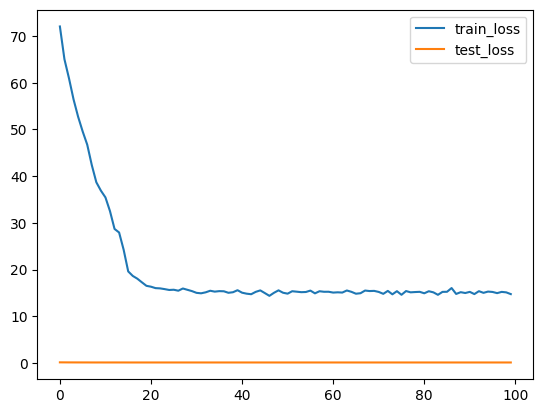

In [10]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])